# Current state of the project:
* Business Understanding
    * Business objectives presented
    * Success Criteria presented
	* Business Requirements presented
	
* Data Understanding
	* Identified variables
	* Analyzed the distribution of the variables
	* Checked for missing data
	* Checked for outliers
	* Checked data correlation
	* Checked for imbalances in the target variable  
  
* Data Preparation
	* Imputed missing data
	* Removed outliers
	* Removed highly correlated variables
	* Balanced the target variable

* We have already started implementing the models, but we have not yet compared them and selected the best one, which is why this part has not been included here at all.

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from scipy import stats
import sklearn.metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from mixed_naive_bayes import MixedNB
from sklearn.svm import SVC

# Current state:

# 1. Business understanding:

In today's telecommunications world, retaining a customer is a challenge that needs to be addressed before they decide to switch operators. The issue of customer loss, also known as "churn," is significant, requiring modern strategies. The "Churn Prediction" project aims to understand how customer departures impact the overall business and how to predict who might be next on the list of potential churners.

Losing customers is not just a loss of current revenue; it also means missing opportunities for future benefits from new services or development. Each customer is a valuable asset, and understanding their needs and expectations is crucial for industry strategy. Hence, predictive systems based on modern technologies are being developed. Data analysis helps identify patterns and signals that may indicate a customer is considering changing service providers.

In the context of the customer churn prediction project in the telecommunications industry, our focus is on a deep understanding of the industry context, which is crucial for an effective strategy. Objectives include not only analyzing the problem but also actively managing customer retention. This is directed towards specific business goals, such as reducing the customer churn rate or increasing overall retention. Additionally, ensuring access to historical customer data is crucial. Such an approach allows for better understanding of the problem and more effective action to maintain competitiveness and stable growth in the dynamic telecommunications industry.

We utilize the CRISP-DM model, enabling an organized approach to the data analysis process, from understanding the business context to implementing effective retention strategies. The CRISP-DM (Cross-Industry Standard Process for Data Mining) model provides a framework that contributes to systematic progress and achieving success in data analysis projects. Our priorities include:

* Business Objectives:

    * Understanding the impact of customer churn on revenues and retention efforts.
    * Developing predictive systems to foresee potential departures.
    * Implementing targeted campaigns to retain customers.

* Success Criteria:

    * Reduction of the customer churn rate by a specified percentage.
    * Increase in customer retention and overall revenues.

* Business Requirements:

    * Access to historical customer data.
    * Collaboration with the marketing and customer service teams during campaign 



# 2. Data Understanding

Looking at the raw data, we can categorize the variables into different types based on their nature:

1. Interval-Scaled Variables:

    * ACCOUNTLENGTH
    * NUMBERVMAILMESSAGES (Number of Voicemail Messages)
    * TOTALDAYMINUTES
    * TOTALDAYCALLS 
    * TOTALDAYCHARGE
    * TOTALEVEMINUTES (Total Evening Minutes)
    * TOTALEVECALLS (Total Evening Calls)
    * TOTALEVECHARGE (Total Evening Charge)
    * TOTALNIGHTMINUTES
    * TOTAL NIGHT CALLS
    * TOTAL NIGHT CHARGE
    * TOTAL INTL MINUTES (Total International Minutes)
    * TOTAL INTL CALLS (Total International Calls)
    * TOTAL INTL CHARGE (Total International Charge)
    * CUSTOMER SERVICE CALLS

2. Binary Variables:

    * INTERNATIONALPLAN
    * VOICEMAILPLAN
    * CHURN


In [84]:
df = pd.read_csv("./../churn_data.csv")
numerical_columns = df.select_dtypes(include=['float64']).columns
df.describe(include='all')

churn  accountlength internationalplan voicemailplan  \
count   5000    4951.000000              4950          4950   
unique     2            NaN                 2             2   
top       No            NaN                no            no   
freq    4293            NaN              4481          3638   
mean     NaN     100.238295               NaN           NaN   
std      NaN      39.718817               NaN           NaN   
min      NaN       1.000000               NaN           NaN   
25%      NaN      73.000000               NaN           NaN   
50%      NaN     100.000000               NaN           NaN   
75%      NaN     127.000000               NaN           NaN   
max      NaN     243.000000               NaN           NaN   

        numbervmailmessages  totaldayminutes  totaldaycalls  totaldaycharge  \
count           4950.000000      4950.000000    4950.000000     4950.000000   
unique                  NaN              NaN            NaN             NaN   
top                     NaN              NaN            NaN             NaN   
freq                    NaN              NaN            NaN             NaN   
mean               7.763636       180.306625     100.038788       30.629386   
std               13.552928        53.926625      19.844529        9.148881   
min                0.000000         0.000000       0.000000        0.000000   
25%                0.000000       143.700000      87.000000       24.430000   
50%                0.000000       180.100000     100.000000       30.600000   
75%               17.000000       216.200000     113.000000       36.720000   
max               52.000000       351.500000     165.000000       59.760000   

        totaleveminutes  totalevecalls  totalevecharge  totalnightminutes  \
count       4950.000000    4950.000000     4950.000000        4950.000000   
unique              NaN            NaN             NaN                NaN   
top                 NaN            NaN             NaN                NaN   
freq                NaN            NaN             NaN                NaN   
mean         200.679798     100.243838       17.048293         200.465697   
std           50.486434      19.837380        4.300503          50.498290   
min            0.000000       0.000000        0.000000           0.000000   
25%          166.425000      87.000000       14.130000         167.000000   
50%          201.000000     101.000000       17.090000         200.550000   
75%          234.100000     114.000000       19.897500         234.700000   
max          363.700000     170.000000       30.910000         395.000000   

        totalnightcalls  totalnightcharge  totalintlminutes  totalintlcalls  \
count       4950.000000       4950.000000       4950.000000     4950.000000   
unique              NaN               NaN               NaN             NaN   
top                 NaN               NaN               NaN             NaN   
freq                NaN               NaN               NaN             NaN   
mean          99.932929          9.015240         10.259010        4.432525   
std           19.939450          2.276812          2.763712        2.448457   
min            0.000000          0.000000          0.000000        0.000000   
25%           87.000000          7.510000          8.500000        3.000000   
50%          100.000000          9.010000         10.300000        4.000000   
75%          113.000000         10.560000         12.000000        6.000000   
max          175.000000         17.770000         20.000000       20.000000   

        totalintlcharge  numbercustomerservicecalls  
count       4950.000000                 4950.000000  
unique              NaN                         NaN  
top                 NaN                         NaN  
freq                NaN                         NaN  
mean           2.772088                    1.569091  
std            0.744552                    1.305279  
min            0.000000                    0.0000

C:\Users\GODA\AppData\Local\Temp\ipykernel_12840\1806405657.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


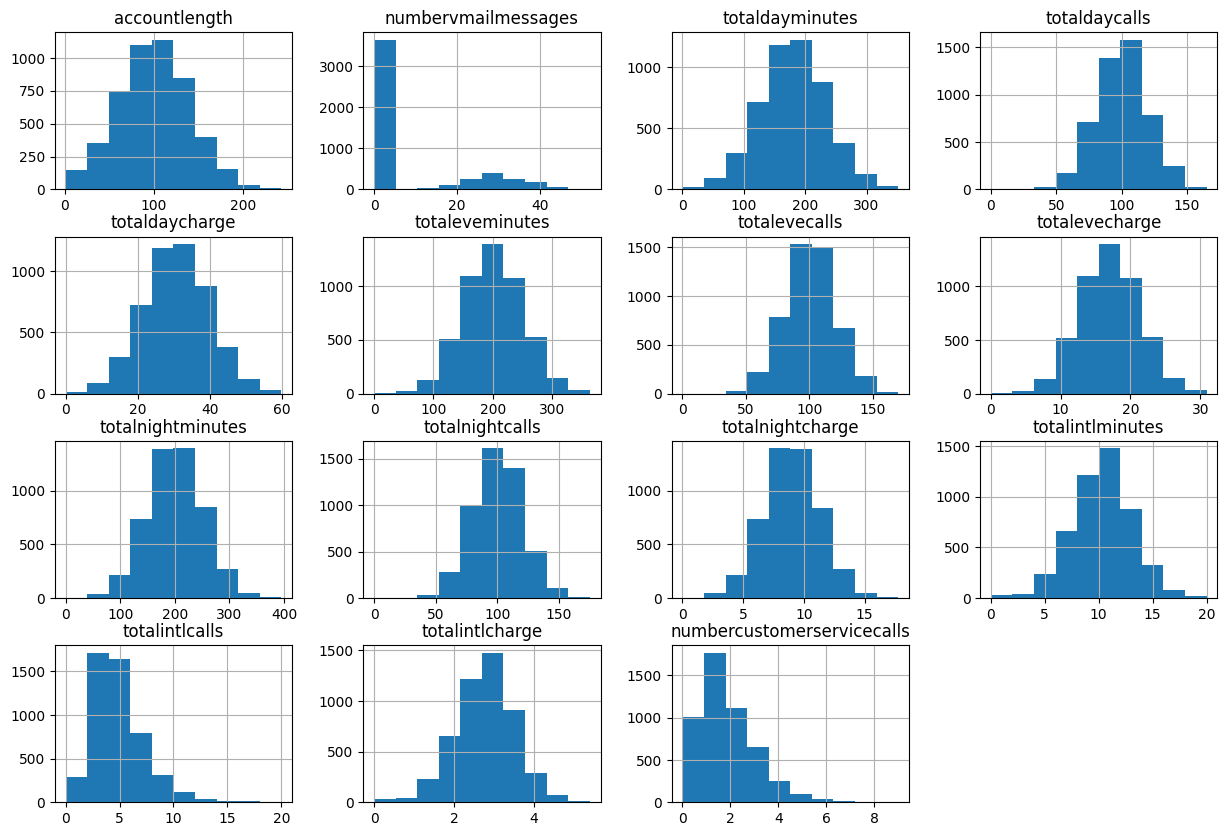

In [85]:
# Histogram for each continuous variable
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

Analyzing the histogram of the numerical varaibles we can see that most of them follow an almost normal distribution.

# Missing data

In [86]:
mv = np.where(pd.isnull(df))
print(f"rows with missing values: {len(np.unique(mv[0]))}\ntotal number of rows: {len(df)}")
print(f"percenteg of rows with missing values: {len(np.unique(mv[0]))/len(df)}")

rows with missing values: 793
total number of rows: 5000
percenteg of rows with missing values: 0.1586


We can see that there is a significant amount of missing data in the dataframe. We will implement multiple options to deal with missing data, including:

1. Dropping the rows with missing values;

2. Data imputation using the average or the most frequent value;

3. Data imputation using kNN.

Since we have a lot of missing data, dropping rows would not be an effective solution. Some of the attributes are left/right skewed, therefore imputing the average value might affect the distributions. We considered kNN as the most effective solution in this case, although we might reconsider after evaluating of the models.

In [87]:
# data imputation using average values
def avgImputer():
    numerical_cols = df.select_dtypes(include='number')
    imputer = SimpleImputer(strategy='mean')
    df[numerical_cols.columns] = imputer.fit_transform(numerical_cols)

    categorical_cols = df.select_dtypes(exclude='number')
    imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols.columns] = imputer.fit_transform(categorical_cols)

# dropping missing values
def dropValues():
    df = df.dropna()

# data imputation using knn
def knnImputer():
    numerical_cols = df.select_dtypes(include='number')
    imputer = KNNImputer(n_neighbors=2)
    df[numerical_cols.columns] = imputer.fit_transform(numerical_cols)

    categorical_cols = df.select_dtypes(exclude='number')
    imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols.columns] = imputer.fit_transform(categorical_cols)


knnImputer()

df.describe(include='all')

churn  accountlength internationalplan voicemailplan  \
count   5000    5000.000000              5000          5000   
unique     2            NaN                 2             2   
top       No            NaN                no            no   
freq    4293            NaN              4531          3688   
mean     NaN     100.226660               NaN           NaN   
std      NaN      39.651528               NaN           NaN   
min      NaN       1.000000               NaN           NaN   
25%      NaN      73.000000               NaN           NaN   
50%      NaN     100.000000               NaN           NaN   
75%      NaN     127.000000               NaN           NaN   
max      NaN     243.000000               NaN           NaN   

        numbervmailmessages  totaldayminutes  totaldaycalls  totaldaycharge  \
count            5000.00000      5000.000000    5000.000000     5000.000000   
unique                  NaN              NaN            NaN             NaN   
top                     NaN              NaN            NaN             NaN   
freq                    NaN              NaN            NaN             NaN   
mean                7.77070       180.333678     100.033400       30.643167   
std                13.53024        53.790111      19.798611        9.152495   
min                 0.00000         0.000000       0.000000        0.000000   
25%                 0.00000       143.700000      87.000000       24.430000   
50%                 0.00000       180.100000     100.000000       30.600000   
75%                17.00000       216.025000     113.000000       36.750000   
max                52.00000       351.500000     165.000000       59.760000   

        totaleveminutes  totalevecalls  totalevecharge  totalnightminutes  \
count       5000.000000    5000.000000     5000.000000        5000.000000   
unique              NaN            NaN             NaN                NaN   
top                 NaN            NaN             NaN                NaN   
freq                NaN            NaN             NaN                NaN   
mean         200.633490     100.243400       17.054053         200.463720   
std           50.344162      19.792438        4.293719          50.339301   
min            0.000000       0.000000        0.000000           0.000000   
25%          166.600000      87.000000       14.147500         167.100000   
50%          201.000000     100.000000       17.090000         200.500000   
75%          234.000000     114.000000       19.900000         234.525000   
max          363.700000     170.000000       30.910000         395.000000   

        totalnightcalls  totalnightcharge  totalintlminutes  totalintlcalls  \
count       5000.000000       5000.000000       5000.000000     5000.000000   
unique              NaN               NaN               NaN             NaN   
top                 NaN               NaN               NaN             NaN   
freq                NaN               NaN               NaN             NaN   
mean          99.908000          9.017409         10.265140        4.427800   
std           19.890587          2.272583          2.757769        2.440303   
min            0.000000          0.000000          0.000000        0.000000   
25%           87.000000          7.510000          8.500000        3.000000   
50%          100.000000          9.015000         10.300000        4.000000   
75%          113.000000         10.560000         12.000000        6.000000   
max          175.000000         17.770000         20.000000       20.000000   

        totalintlcharge  numbercustomerservicecalls  
count       5000.000000                 5000.000000  
unique              NaN                         NaN  
top                 NaN                         NaN  
freq                NaN                         NaN  
mean           2.772073                    1.568800  
std            0.742526                    1.301117  
min            0.000000                    0.0000

# Outliers

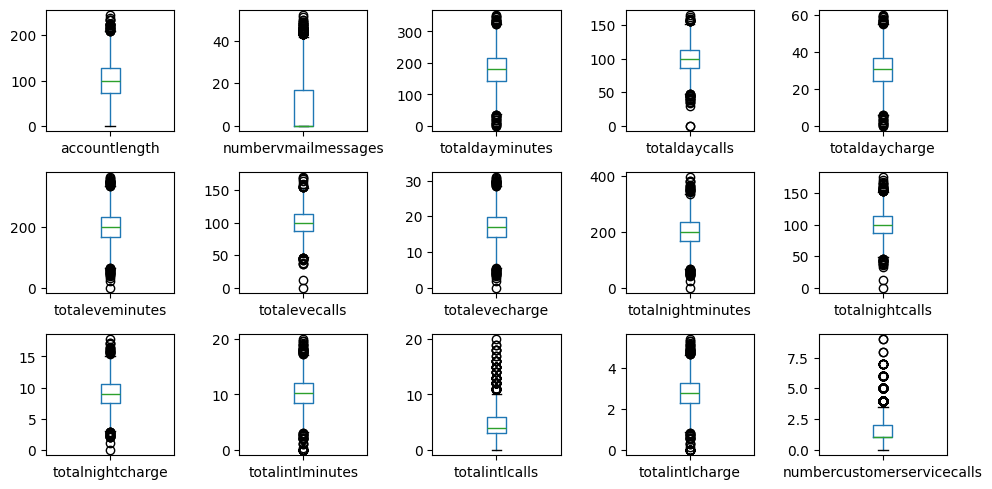

In [88]:
# Boxplots for each continuous variable
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 5))  
numerical_columns = df.select_dtypes(include=['float64']).columns
for i in range(len(numerical_columns)):
    df.boxplot(column=numerical_columns[i], ax=axes[i//5, i%5], grid=False)
plt.tight_layout()
plt.show()

In [89]:
numerical_columns = df.select_dtypes(include=['float64']).columns
z_scores = stats.zscore(df.loc[:,numerical_columns])
threshold = 3  # Adjustable threshold

# Find indices of outliers
outlier_indices = (abs(z_scores) > threshold).any(axis=1)

print(f"Number of rows with outliers: {np.sum(outlier_indices)}")
print(f"percentage of rows with outliers: {np.sum(outlier_indices)/len(df)}")


Number of rows with outliers: 260
percentage of rows with outliers: 0.052


As we have a small number of rows with outliers so we decided to drop those rows.

In [90]:
df = df[~outlier_indices]
df.describe()

accountlength  numbervmailmessages  totaldayminutes  totaldaycalls  \
count    4740.000000          4740.000000      4740.000000    4740.000000   
mean       99.872922             7.668354       180.720601     100.095886   
std        39.241243            13.409392        53.083116      19.497616   
min         1.000000             0.000000        19.500000      42.000000   
25%        73.000000             0.000000       144.100000      87.000000   
50%       100.000000             0.000000       180.100000     100.000000   
75%       126.000000            16.000000       216.625000     113.000000   
max       217.000000            48.000000       338.400000     158.000000   

       totaldaycharge  totaleveminutes  totalevecalls  totalevecharge  \
count     4740.000000      4740.000000    4740.000000     4740.000000   
mean        30.708243       200.740316     100.295781       17.067363   
std          9.034007        49.627261      19.557145        4.227306   
min          3.320000        52.900000      42.000000        4.500000   
25%         24.498750       166.775000      87.000000       14.177500   
50%         30.610000       201.000000     101.000000       17.090000   
75%         36.840000       233.900000     114.000000       19.882500   
max         57.530000       351.600000     159.000000       29.890000   

       totalnightminutes  totalnightcalls  totalnightcharge  totalintlminutes  \
count        4740.000000      4740.000000       4740.000000       4740.000000   
mean          200.444958        99.869198          9.016412         10.319525   
std            49.589950        19.515015          2.239334          2.623154   
min            50.100000        42.000000          2.250000          2.000000   
25%           167.200000        87.000000          7.510000          8.600000   
50%           200.500000       100.000000          9.020000         10.400000   
75%           234.625000       113.000000         10.560000         12.100000   
max           350.200000       159.000000         15.760000         18.400000   

       totalintlcalls  totalintlcharge  numbercustomerservicecalls  
count     4740.000000      4740.000000                 4740.000000  
mean         4.319937         2.786921                    1.522679  
std          2.142284         0.706234                    1.206852  
min          1.000000         0.570000                    0.000000  
25%          3.000000         2.320000                    1.000000  
50%          4.000000         2.810000                    1.000000  
75%          6.000000         3.270000                    2.000000  
max         11.000000         4.970000                    5.000000

# Data correlation

Now we will take a look at the correlation of the variables with each other and with our target variable.

<Axes: >

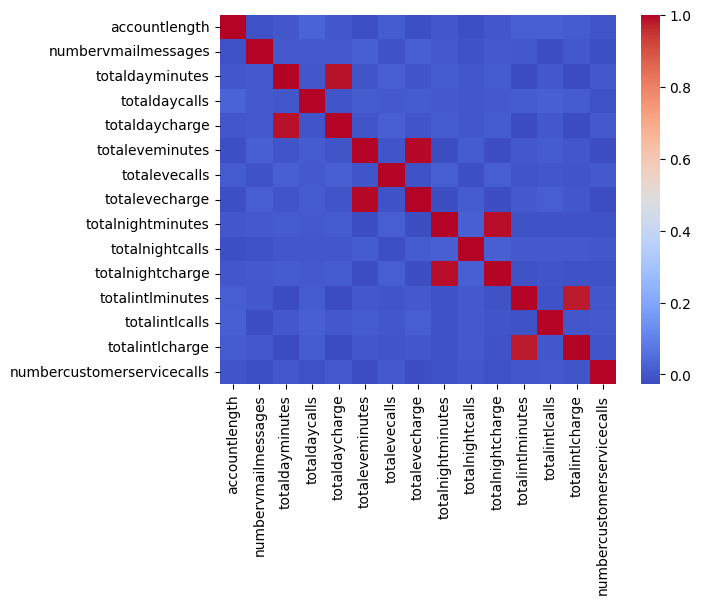

In [91]:
numerical_columns = df.select_dtypes(include=['float64']).columns
string_columns = df.select_dtypes(exclude=['float64']).columns
corr_matrix =  df.loc[:,numerical_columns].corr()
sns.heatmap(corr_matrix, cmap='coolwarm')

As we can see there is some variables with a high correlation with each other:
* totaldayminutes-totaldaycharge
* totalevecharge-totaleveminutes
* totalnightcharge-totalnightminutes
* totalintlcharge-totalintlminutes

To each of this pair of variables we will analyze the correlation with the target variable and drop the variable with the least correlation in order to not have repeated data in our analysis.

In [92]:
corr = {}

for col in string_columns:

    contingency_table = pd.crosstab(df['churn'], df[col])

    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    corr[col] = p

churn = df['churn'].map({
    'Yes': 0,
    'No' : 1
})


for col in numerical_columns:

    correlation, p = stats.pointbiserialr(df[col], churn)
    corr[col] = p


vars = [('totaldayminutes','totaldaycharge'),('totalevecharge','totaleveminutes'),('totalnightcharge','totalnightminutes'),('totalintlcharge','totalintlminutes')]

for var in vars:
    if corr[var[0]] < corr[var[1]]:
        df = df.drop([var[0]], axis=1)
    else : 
        df = df.drop([var[1]], axis=1)

df.describe(include='all')

churn  accountlength internationalplan voicemailplan  \
count   4740    4740.000000              4740          4740   
unique     2            NaN                 2             2   
top       No            NaN                no            no   
freq    4094            NaN              4293          3507   
mean     NaN      99.872922               NaN           NaN   
std      NaN      39.241243               NaN           NaN   
min      NaN       1.000000               NaN           NaN   
25%      NaN      73.000000               NaN           NaN   
50%      NaN     100.000000               NaN           NaN   
75%      NaN     126.000000               NaN           NaN   
max      NaN     217.000000               NaN           NaN   

        numbervmailmessages  totaldayminutes  totaldaycalls  totalevecalls  \
count           4740.000000      4740.000000    4740.000000    4740.000000   
unique                  NaN              NaN            NaN            NaN   
top                     NaN              NaN            NaN            NaN   
freq                    NaN              NaN            NaN            NaN   
mean               7.668354       180.720601     100.095886     100.295781   
std               13.409392        53.083116      19.497616      19.557145   
min                0.000000        19.500000      42.000000      42.000000   
25%                0.000000       144.100000      87.000000      87.000000   
50%                0.000000       180.100000     100.000000     101.000000   
75%               16.000000       216.625000     113.000000     114.000000   
max               48.000000       338.400000     158.000000     159.000000   

        totalevecharge  totalnightminutes  totalnightcalls  totalintlcalls  \
count      4740.000000        4740.000000      4740.000000     4740.000000   
unique             NaN                NaN              NaN             NaN   
top                NaN                NaN              NaN             NaN   
freq               NaN                NaN              NaN             NaN   
mean         17.067363         200.444958        99.869198        4.319937   
std           4.227306          49.589950        19.515015        2.142284   
min           4.500000          50.100000        42.000000        1.000000   
25%          14.177500         167.200000        87.000000        3.000000   
50%          17.090000         200.500000       100.000000        4.000000   
75%          19.882500         234.625000       113.000000        6.000000   
max          29.890000         350.200000       159.000000       11.000000   

        totalintlcharge  numbercustomerservicecalls  
count       4740.000000                 4740.000000  
unique              NaN                         NaN  
top                 NaN                         NaN  
freq                NaN                         NaN  
mean           2.786921                    1.522679  
std            0.706234                    1.206852  
min            0.570000                    0.000000  
25%            2.320000                    1.000000  
50%            2.810000                    1.000000  
75%            3.270000                    2.000000  
max            4.970000                    5.000000

# Data scaling
Some models work better if our data is all in the same scale so in this step we will scale our data.

In [93]:
numerical_columns = df.select_dtypes(include=['float64']).columns

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(df.loc[:,numerical_columns])
df.loc[:,numerical_columns] = minMaxScaler.transform(df.loc[:,numerical_columns])

df.describe()

accountlength  numbervmailmessages  totaldayminutes  totaldaycalls  \
count    4740.000000          4740.000000      4740.000000    4740.000000   
mean        0.457745             0.159757         0.505552       0.500827   
std         0.181672             0.279362         0.166457       0.168083   
min         0.000000             0.000000         0.000000       0.000000   
25%         0.333333             0.000000         0.390718       0.387931   
50%         0.458333             0.000000         0.503606       0.500000   
75%         0.578704             0.333333         0.618140       0.612069   
max         1.000000             1.000000         1.000000       1.000000   

       totalevecalls  totalevecharge  totalnightminutes  totalnightcalls  \
count    4740.000000     4740.000000        4740.000000      4740.000000   
mean        0.498255        0.494973           0.500983         0.494609   
std         0.167155        0.166495           0.165245         0.166795   
min         0.000000        0.000000           0.000000         0.000000   
25%         0.384615        0.381154           0.390203         0.384615   
50%         0.504274        0.495865           0.501166         0.495726   
75%         0.615385        0.605849           0.614878         0.606838   
max         1.000000        1.000000           1.000000         1.000000   

       totalintlcalls  totalintlcharge  numbercustomerservicecalls  
count     4740.000000      4740.000000                 4740.000000  
mean         0.331994         0.503846                    0.304536  
std          0.214228         0.160508                    0.241370  
min          0.000000         0.000000                    0.000000  
25%          0.200000         0.397727                    0.200000  
50%          0.300000         0.509091                    0.200000  
75%          0.500000         0.613636                    0.400000  
max          1.000000         1.000000                    1.000000

# Binary varaibles
In order to be used in some models we need all variables to be numerical so we will transform our binary variables in numerical data.

In [94]:
df['internationalplan'] = df['internationalplan'].map({
    'yes': 0,
    'no' : 1
})

df['voicemailplan'] = df['voicemailplan'].map({
    'yes': 0,
    'no' : 1
})

# Data splitting
Here we split ou data into train and test data to be used on our models

In [95]:
numerical_columns = df.select_dtypes(include=['float64']).columns

x = df[numerical_columns]
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Handling Imbalanced Data

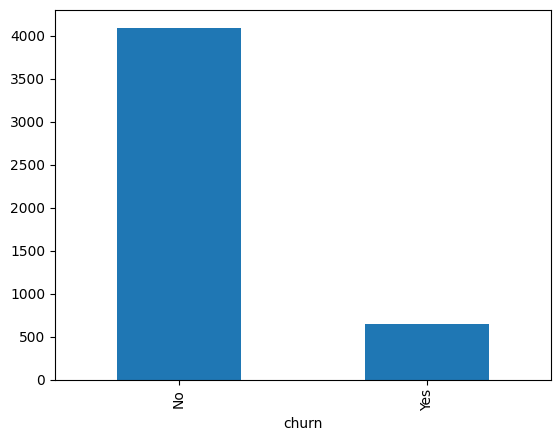

churn
No     4094
Yes     646
Name: count, dtype: int64

In [96]:
df['churn'].value_counts().plot.bar()
plt.show()

df['churn'].value_counts()

As we can see we have a higly unbalanced target variable.

Some models work better when our target variables have a similar number of cases in each class, in order to transform our data to get that scenario we thought of two approaches: over-sampling our data and under-sampling our data. In the code bellow we have both implementations, later we will analyze wich one gives us the best results for our models.

In [97]:
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

# Display class distribution after oversampling
print("\nClass distribution after oversampling:")
print(pd.Series(y_oversampled).value_counts())

# Apply RandomUnderSampler to address class imbalance
rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)

# Display class distribution after undersampling
print("\nClass distribution after undersampling:")
print(pd.Series(y_undersampled).value_counts())


Class distribution after oversampling:
churn
No     3273
Yes    3273
Name: count, dtype: int64

Class distribution after undersampling:
churn
No     519
Yes    519
Name: count, dtype: int64


# Models
## KNN

In [98]:
params = {
    'n_neighbors': [3,5,7,9,11,13],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'p' : [1,2,3,4,5]
    }


clf_accuracy = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,cv=5,n_jobs=5,verbose=1,scoring='accuracy')
clf_accuracy.fit(X_train,y_train)

print(clf_accuracy.best_params_)
knn_accuracy = KNeighborsClassifier(**clf_accuracy.best_params_) 

f1 = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average='micro')

clf_f1 = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,cv=5,n_jobs=5,verbose=1,scoring=f1)
clf_f1.fit(X_train,y_train)

print(clf_f1.best_params_)
knn_f1 = KNeighborsClassifier(n_neighbors=clf_f1.best_params_['n_neighbors'], weights=clf_f1.best_params_['weights'], algorithm=clf_f1.best_params_['algorithm'], p=clf_f1.best_params_['p']) 

combi_knn = VotingClassifier(estimators=[('acc', knn_accuracy), ('f1', knn_f1)], voting='soft')



Fitting 5 folds for each of 180 candidates, totalling 900 fits


{'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Fitting 5 folds for each of 180 candidates, totalling 900 fits
{'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}


In [99]:
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(knn_accuracy, x, y, cv=cv_strategy, scoring='accuracy')

print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

cross_val_scores = cross_val_score(knn_f1, x, y, cv=cv_strategy, scoring=f1)

print("Cross-Validation Scores:", cross_val_scores)
print("Mean f1:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())



Cross-Validation Scores: [0.88396624 0.89767932 0.88396624 0.88924051 0.8871308 ]
Mean Accuracy: 0.8883966244725737
Standard Deviation: 0.005054493059371703
Cross-Validation Scores: [0.88396624 0.89767932 0.88396624 0.88924051 0.8871308 ]
Mean f1: 0.8883966244725737
Standard Deviation: 0.005054493059371703


In [100]:
knn_accuracy.fit(X_undersampled,y_undersampled)

yhat = knn_accuracy.predict(X_test)

acc = sklearn.metrics.accuracy_score(y_test,yhat)
recall = sklearn.metrics.recall_score(y_test,yhat,pos_label='Yes')
prec = sklearn.metrics.precision_score(y_test,yhat,pos_label='Yes')
f1 = sklearn.metrics.f1_score(y_test,yhat,pos_label='Yes')
conf_matrix =  sklearn.metrics.confusion_matrix(y_test,yhat)
print('balanced model')
print(f"accuracy: {acc}")
print(f"recall: {recall}")
print(f"precision: {prec}")
print(f"f1: {f1}")
print(f"confusion matrix:\n{conf_matrix}\n")

knn_f1.fit(X_undersampled,y_undersampled)

yhat = knn_f1.predict(X_test)

acc = sklearn.metrics.accuracy_score(y_test,yhat)
recall = sklearn.metrics.recall_score(y_test,yhat,pos_label='Yes')
prec = sklearn.metrics.precision_score(y_test,yhat,pos_label='Yes')
f1 = sklearn.metrics.f1_score(y_test,yhat,pos_label='Yes')
conf_matrix =  sklearn.metrics.confusion_matrix(y_test,yhat)
print('f1 model')
print(f"accuracy: {acc}")
print(f"recall: {recall}")
print(f"precision: {prec}")
print(f"f1: {f1}")
print(f"confusion matrix:\n{conf_matrix}\n")

combi_knn.fit(X_undersampled,y_undersampled)

yhat = combi_knn.predict(X_test)

acc = sklearn.metrics.accuracy_score(y_test,yhat)
recall = sklearn.metrics.recall_score(y_test,yhat,pos_label='Yes')
prec = sklearn.metrics.precision_score(y_test,yhat,pos_label='Yes')
f1 = sklearn.metrics.f1_score(y_test,yhat,pos_label='Yes')
conf_matrix =  sklearn.metrics.confusion_matrix(y_test,yhat)
print('combination model')
print(f"accuracy: {acc}")
print(f"recall: {recall}")
print(f"precision: {prec}")
print(f"f1: {f1}")
print(f"confusion matrix:\n{conf_matrix}\n")

balanced model
accuracy: 0.8048523206751055
recall: 0.6141732283464567
precision: 0.3644859813084112
f1: 0.4574780058651027
confusion matrix:
[[685 136]
 [ 49  78]]

f1 model
accuracy: 0.8048523206751055
recall: 0.6141732283464567
precision: 0.3644859813084112
f1: 0.4574780058651027
confusion matrix:
[[685 136]
 [ 49  78]]

combination model
accuracy: 0.8048523206751055
recall: 0.6141732283464567
precision: 0.3644859813084112
f1: 0.4574780058651027
confusion matrix:
[[685 136]
 [ 49  78]]



## Naive Bayes

The Naive Bayes works under such assumptions that are best kept if the size of the dataset is large. Therefore, while balancing the classes, we will choose to do oversampling.

In [101]:
def evaluate(model, model_name, columns):
    predictions = model.predict(X_test)

    cm = sklearn.metrics.confusion_matrix(y_test, predictions)

    disp = sklearn.metrics.ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()

    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    total = tp + tn + fp + fn
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)

    print(f"{model_name} Kernel SVM:")
    print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")

    print(f"Accuracy: {(tp+tn)/total}")
    print(f"Error: {1-(tp+tn)/total}")
    print(f"Recall: {recall}")
    print(f"Specificity: {tn/(tn+fp)}")
    print(f"Precision: {precision}")
    print(f"F1: {2*recall*precision/(recall+precision)}")

We have to choose an algorithm for Naive Bayes. In this case, we have both continuous and categorical variables. We will start by using only the continuous variables and use Gaussian Naive Bayes. Then, we will use only the categorical variables and use the Categorical Naive Bayes. Finally, we will use all the variables with the Mixed Naive Bayes. Since all of these models do not require any significant hyperparameters, we will use a simple holdout technique to evaluate them. 

In [102]:
exclude_gaussian = np.array([True, False, False, True, True, True, True, True, True, True, True, True, True])
exclude_categorical = ~exclude_gaussian

In [103]:
gnb=GaussianNB()
gnb.fit(X_oversampled,y_oversampled)

GaussianNB()

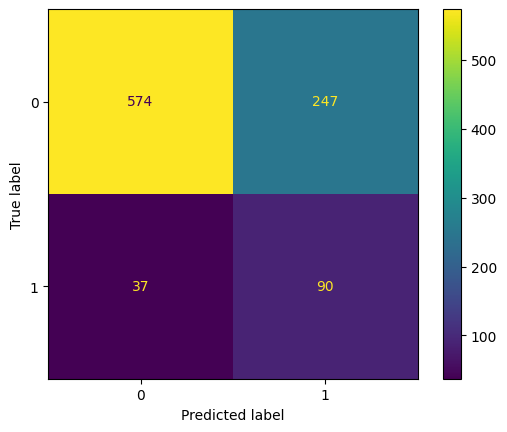

Gaussian Kernel SVM:
TP: 90, TN: 574, FP: 247, FN: 37
Accuracy: 0.70042194092827
Error: 0.29957805907172996
Recall: 0.7086614173228346
Specificity: 0.6991473812423873
Precision: 0.26706231454005935
F1: 0.3879310344827586


In [104]:
evaluate(gnb, "Gaussian", exclude_gaussian)

## SVM

In [105]:
params = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['auto', 'scale', 0.1, 1],
    'degree': [2, 3, 4],
    }

clf_accuracy = GridSearchCV(estimator=SVC(),param_grid=params,cv=5,n_jobs=5,verbose=1,scoring='accuracy')
clf_accuracy.fit(X_train,y_train)

print(clf_accuracy.best_params_)
svc_accuracy = SVC(**clf_accuracy.best_params_) 

f1 = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average='micro')

clf_f1 = GridSearchCV(estimator=SVC(),param_grid=params,cv=5,n_jobs=5,verbose=1,scoring=f1)
clf_f1.fit(X_train,y_train)

print(clf_f1.best_params_)
svc_f1 = SVC(**clf_accuracy.best_params_) 

combi_svc = VotingClassifier(estimators=[('acc', svc_accuracy), ('f1', svc_f1)], voting='soft')

Fitting 5 folds for each of 192 candidates, totalling 960 fits
{'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Fitting 5 folds for each of 192 candidates, totalling 960 fits
{'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}


Since our data has unbalanced classes, we will apply one of the techniques we saw on the pre-processing phase. For the SVM, since it depends heavily on the support vectors, it may be a good idea to do undersampling: reducing the data may lead to fairly equal results as oversampling, and in this case we reduce the training time for the model.

Before doing hyperparameter tuning, we get an overall understanding of how each kernel behaves with this data by evaluating it with a simple holdout method.

In [106]:
def evaluate(model, model_name):
    predictions = model.predict(X_test)

    cm = sklearn.metrics.confusion_matrix(y_test, predictions)

    sklearn.metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()

    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    total = tp + tn + fp + fn
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)

    print(f"{model_name} Kernel SVM:")
    print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")

    print(f"Accuracy: {(tp+tn)/total}")
    print(f"Error: {1-(tp+tn)/total}")
    print(f"Recall: {recall}")
    print(f"Specificity: {tn/(tn+fp)}")
    print(f"Precision: {precision}")
    print(f"F1: {2*recall*precision/(recall+precision)}")


In [107]:
svmLinear = SVC(kernel='linear', C=100)
svmLinear.fit(X_undersampled, y_undersampled)

SVC(C=100, kernel='linear')

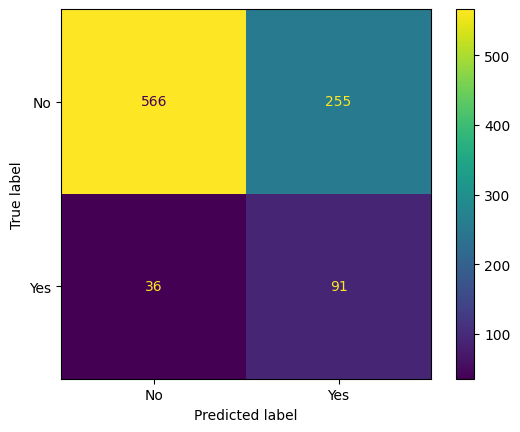

Linear Kernel SVM:
TP: 91, TN: 566, FP: 255, FN: 36
Accuracy: 0.6930379746835443
Error: 0.30696202531645567
Recall: 0.7165354330708661
Specificity: 0.6894031668696712
Precision: 0.2630057803468208
F1: 0.38477801268498946


In [108]:
evaluate(svmLinear, "Linear")

In [109]:
svmPoly = SVC(kernel='poly', C=100)
svmPoly.fit(X_undersampled, y_undersampled)

SVC(C=100, kernel='poly')

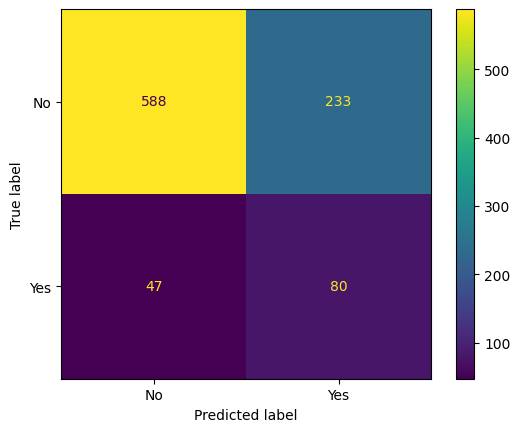

Polinomial Kernel SVM:
TP: 80, TN: 588, FP: 233, FN: 47
Accuracy: 0.7046413502109705
Error: 0.2953586497890295
Recall: 0.6299212598425197
Specificity: 0.7161997563946407
Precision: 0.25559105431309903
F1: 0.36363636363636365


In [110]:
evaluate(svmPoly, "Polinomial")

In [111]:
svmRBF = SVC(kernel='rbf', C=100)
svmRBF.fit(X_undersampled, y_undersampled)

SVC(C=100)

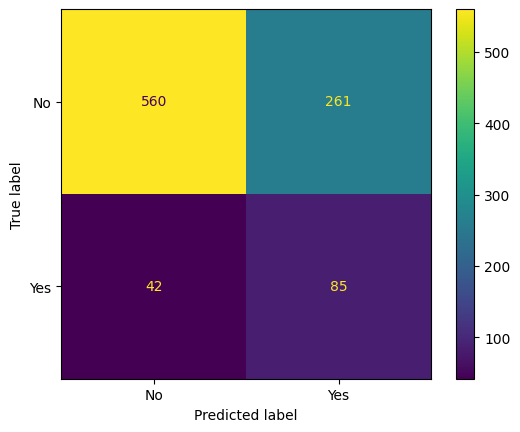

RBF Kernel SVM:
TP: 85, TN: 560, FP: 261, FN: 42
Accuracy: 0.680379746835443
Error: 0.319620253164557
Recall: 0.6692913385826772
Specificity: 0.682095006090134
Precision: 0.24566473988439305
F1: 0.35940803382663844


In [112]:
evaluate(svmRBF, "RBF")

In [113]:
svmSigmoid = SVC(kernel="sigmoid", C=100)
svmSigmoid.fit(X_undersampled, y_undersampled)

SVC(C=100, kernel='sigmoid')

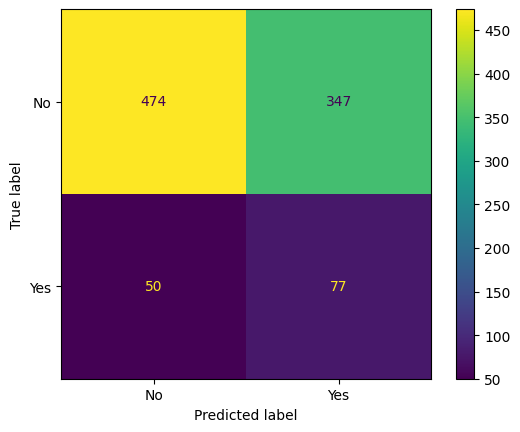

Sigmoid Kernel SVM:
TP: 77, TN: 474, FP: 347, FN: 50
Accuracy: 0.5812236286919831
Error: 0.4187763713080169
Recall: 0.6062992125984252
Specificity: 0.5773447015834349
Precision: 0.18160377358490565
F1: 0.279491833030853


In [114]:
evaluate(svmSigmoid, "Sigmoid")

Still using simple holdout technique, we will see how changing the hyperparameter C affects the f1-score of the model.

In [115]:
def f1_testing(kernel, n, div):
    recalls = [0] * (n-1)
    list = [*range(1, n)]
    cValues = [x/div for x in list]

    j = 0
    for i in cValues:
        svmPoly = SVC(kernel=kernel, C=i)
        svmPoly.fit(X_undersampled, y_undersampled)

        predictions = svmPoly.predict(X_test)
        recall = sklearn.metrics.f1_score(y_test, predictions,pos_label='Yes')

        recalls[j] = recall
        j+=1

    plt.scatter(cValues, recalls)

    plt.xlabel('C')
    plt.ylabel('F1-Score')

    plt.title(f'Relation between hyperparameter C and F1-Score for {kernel}')
    plt.show()


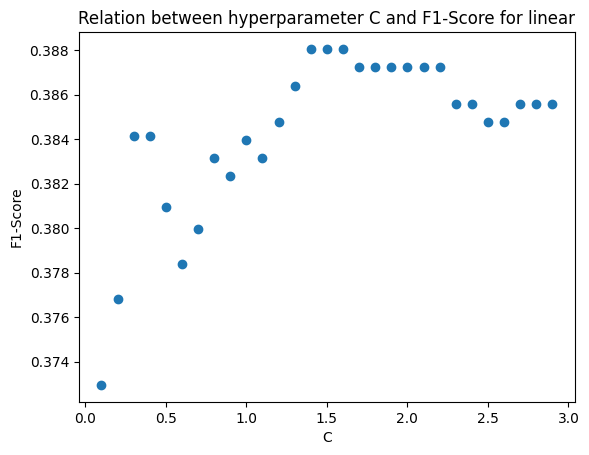

In [116]:
f1_testing('linear', 30, 10)

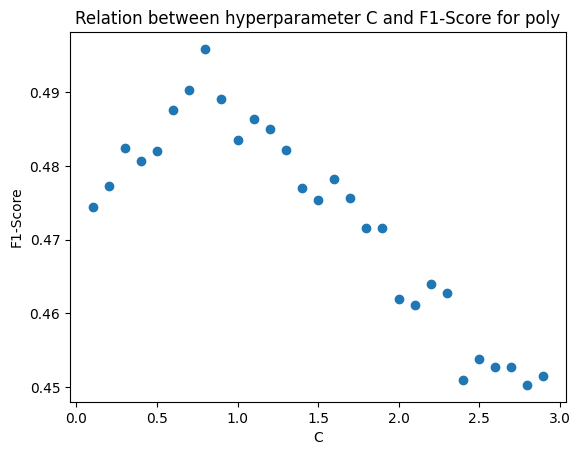

In [117]:
f1_testing('poly', 30, 10)

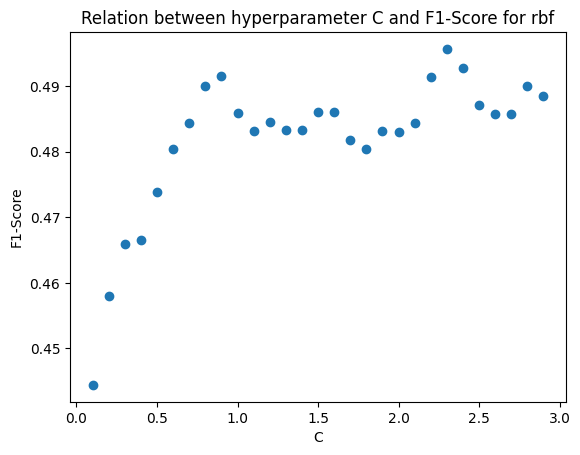

In [118]:
f1_testing('rbf', 30, 10)

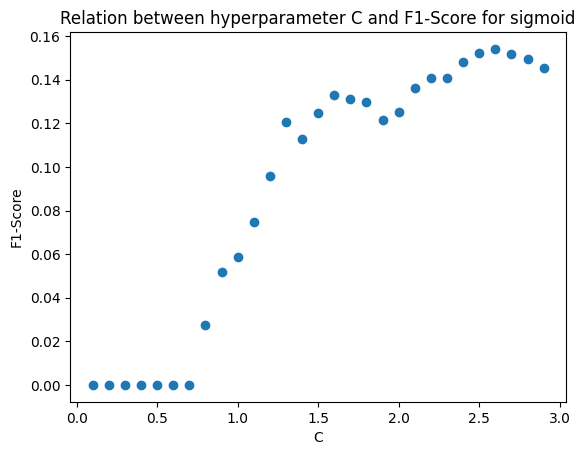

In [119]:
f1_testing('sigmoid', 30, 10)

Overall, the sigmoid function does not seem to have a good scoring, so we will stop evaluating it.
For the case of the rbf kernel, we can see that setting a very small value for C leads to poor results, possibly because of overfitting.
The best results were for the rbf kernel, with a hyperparameter C of around 2.
Next, we will do hyperparameter tuning using a validation set with 10-fold cross-validation.
We will choose 2 models, one for the best f1-score, and later one for the best overall accuracy.

In [120]:
def cvSVMC(kernel, n, div, scoring):
    recalls = [0] * (n-1)
    std = [0] * (n-1)
    list = [*range(1, n)]
    cValues = [x/div for x in list]
    j = 0
    for i in cValues:
        svm = SVC(kernel=kernel, C=i)
        scores=cross_val_score(svm, X_undersampled, y_undersampled, cv=10, scoring=scoring)

        std[j] = scores.std()
        recalls[j] = scores.mean()
        j+=1

    print(f"Standard Deviations: {std}")
    plt.scatter(cValues, recalls)

    plt.xlabel('C')
    plt.ylabel(scoring)

    plt.title(f'Relation between hyperparameter C and {scoring} for {kernel}')
    plt.show()
    

c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\

Standard Deviations: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


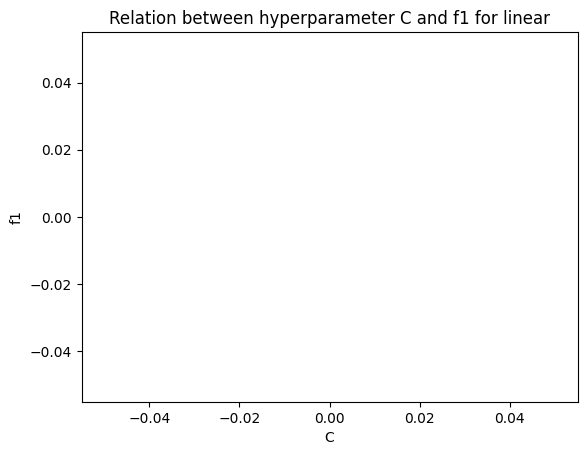

In [121]:
cvSVMC('linear', n=30, div=10, scoring='f1')

c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\

Standard Deviations: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\

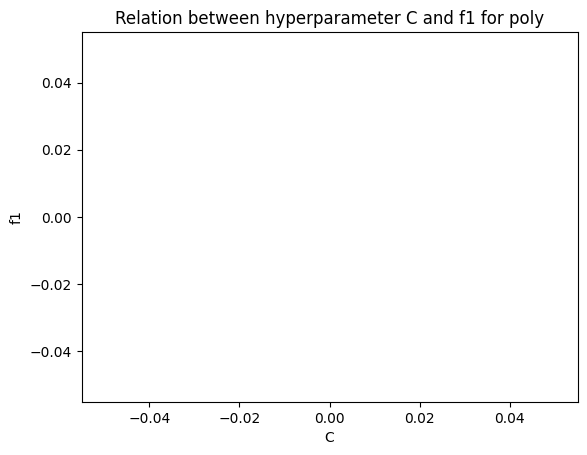

In [122]:
cvSVMC('poly', n=40, div=5, scoring='f1')

For the polynomial kernel, we have high values of recall for small values of C, which, again, may indicate overfitting. After C=2, the values for the recall decrease, a possible sign of underfitting. An adequate value would be around 1.5.

c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\

Standard Deviations: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


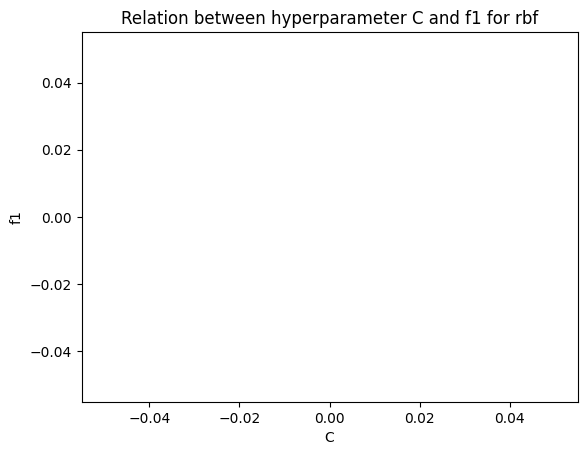

In [123]:
cvSVMC('rbf', n = 60, div=10, scoring='f1')

The RBF Kernel seems to have good values for the f1-score for C around 1.5, and it stays the same after C = 2. Therefore, adequate values would be greater than 1 and smaller than 2. We can also see that the overall f1-score is the highest for this kernel. Choosing the rbf kernel with C=1.5 seems like a viable choice. Now we will try to choose an adequate value for the gamma hyperparameter.

In [124]:
def cvSVMGamma(kernel, n, div, scoring):
    recalls = [0] * (n-1)
    std = [0] * (n-1)
    list = [*range(1, n)]
    cValues = [x/div for x in list]
    j = 0
    for i in cValues:
        svm = SVC(kernel=kernel, C=1.5, gamma=i)
        scores=cross_val_score(svm, X_undersampled, y_undersampled, cv=10, scoring=scoring)

        std[j] = scores.std()
        recalls[j] = scores.mean()
        j+=1

    print(f"Standard Deviations: {std}")
    plt.scatter(cValues, recalls)

    plt.xlabel('C')
    plt.ylabel('Recall')

    plt.title(f'Relation between hyperparameter gamma and {scoring} for {kernel}')
    plt.show()

c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\

Standard Deviations: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\GODA\AppData\Local\Programs\Python\Python311\

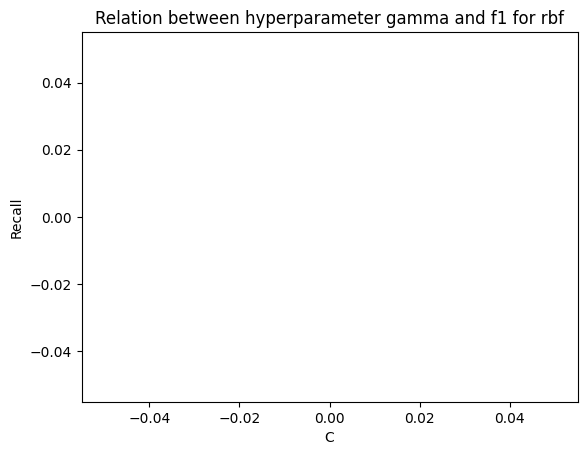

In [125]:
cvSVMGamma('rbf', 40, 10, 'f1')

We can see that after gamma=1, the f1-score stays relatively equal. We will choose gamma=1 as our hyperparameter.
The best model we found for the SVM in terms of f1-score has the following hyperparameters: RBF kernel, 1.5 for C and 1 for gamma. Now we will train this model in the full training set and test it on the test set.

In [126]:
# Best Results for F1: kernel='rbf', C=1.5, gamma=1

svmRBF = SVC(kernel='rbf', C=1.5, gamma=1)
svmRBF.fit(X_undersampled, y_undersampled)

SVC(C=1.5, gamma=1)

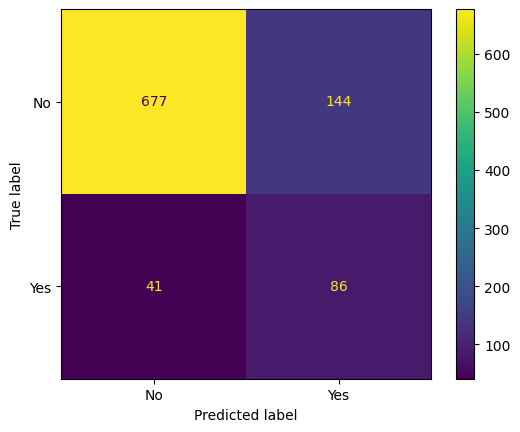

RBF Kernel SVM:
TP: 86, TN: 677, FP: 144, FN: 41
Accuracy: 0.8048523206751055
Error: 0.19514767932489452
Recall: 0.6771653543307087
Specificity: 0.8246041412911084
Precision: 0.3739130434782609
F1: 0.48179271708683474


In [127]:
evaluate(svmRBF, 'RBF')

Finally testing the model with all the hyperparameters chosen, we get an accuracy of 84% and an f1-score of 57%.
The accuracy is decent, but the F1-Score is not. It may be the case that the rbf kernel is not able to make a linear separation of this dataset, and other kernels may even be better. It does seem, however, that for the tested kernels (and hyperparameters), this is the best option. We will now build a model for the best possible accuracy.

Standard Deviations: [0.03735370872971551, 0.03836996251759583, 0.038109050981276996, 0.04160136361705064, 0.0444919281753034, 0.047702026637599315, 0.04445877779698694, 0.04506718266438108, 0.047475781058421616, 0.04842876918937242, 0.04866147312439287, 0.04724583475854709, 0.04618867809209908, 0.04515906838410426, 0.04552205458630377, 0.04349893669932781, 0.04349893669932781, 0.04337546364762385, 0.04323025661379439, 0.04183127719959915, 0.04323025661379439, 0.04187801036054798, 0.04187801036054798, 0.041826635286233725, 0.041826635286233725, 0.04313702003745546, 0.04337546364762385, 0.04337546364762385, 0.04337546364762385]


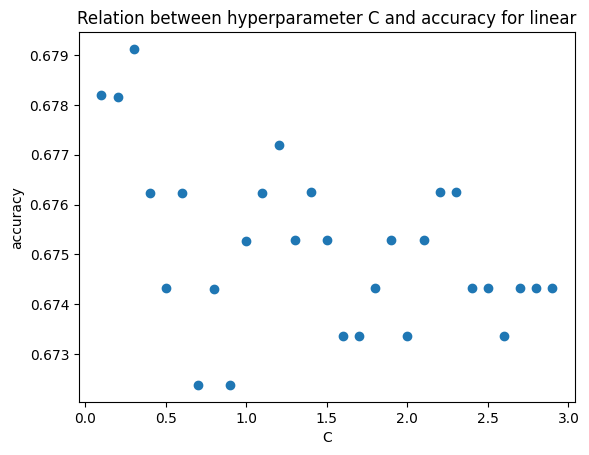

In [128]:
cvSVMC('linear', n=30, div=10, scoring='accuracy')

The values for the accuracy using linear kernel are very disperse, and overall not good.

Standard Deviations: [0.033347213892183564, 0.030024872037180104, 0.04147926462455311, 0.04024462773814491, 0.03958945632674366, 0.037386535566758396, 0.03970784575727898, 0.042547473650761544, 0.04022352625630188, 0.04004988847577926, 0.03820744559817127, 0.03776710640576313, 0.035255511592913166, 0.03326991911068979, 0.03326991911068979, 0.03525778567256316, 0.036441981634833136, 0.03425993511855345, 0.037732135927585765, 0.03945500702922061, 0.04106257967417941, 0.03900527973139861, 0.03789803993700674, 0.03740850002482208, 0.03763182931379099, 0.039570392877128574, 0.03954849645163693, 0.041599323190748355, 0.04191638729273426]


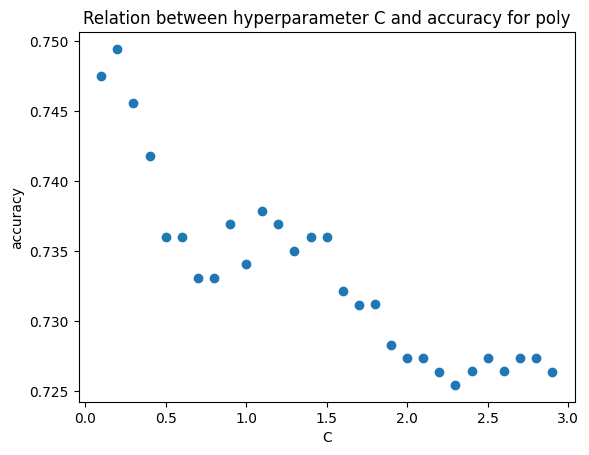

In [129]:
cvSVMC('poly', n =30, div=10, scoring='accuracy')

For the polynomial kernel, there seems to be some overfitting for small values of C. After C=0.8, the values stay the same until C = 2.5, where it decreases, indicating signs of underfitting. The best values for C for the polynomial Kernel would be between 1 and 2.

Standard Deviations: [0.030271975650175073, 0.026990594064382534, 0.022449342662583537, 0.028416135471080413, 0.030399315452929267, 0.030061260856911385, 0.02985853859444568, 0.0319540629383006, 0.02894720921861829, 0.03017100742904646, 0.032712102611280325, 0.03536793381972344, 0.032985581464398034, 0.034621301769059004, 0.03711796544078955, 0.0372503747376355, 0.037871125690573756, 0.037871125690573756, 0.03855559354848564, 0.0391012887641613, 0.03938207124408562, 0.04271731231226991, 0.041682162818054265, 0.03914075396877694, 0.03842558065225901, 0.04048573261406872, 0.04122875285579234, 0.04029505254077124, 0.04111555278603422, 0.0410501144069953, 0.041633632619658224, 0.04196744691667036, 0.0409435950828729, 0.04130124971380986, 0.04130124971380986, 0.04130124971380986, 0.041967446916670356, 0.04146176688605315, 0.04146176688605315, 0.0409435950828729, 0.043039339646331845, 0.045688446616597635, 0.045688446616597635, 0.04788415278385563, 0.04788415278385563, 0.04664072928992869, 0

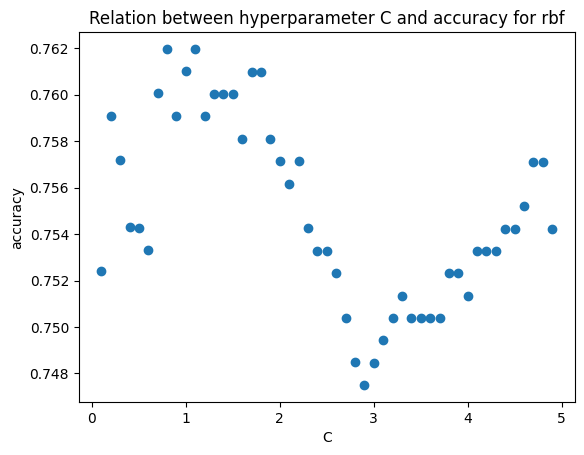

In [130]:
cvSVMC('rbf', n=50, div=10, scoring='accuracy')

The RBF kernel shows poor results for small C values, and it stays around the same after C = 1. An adequate value would be 1.5. Again, these are the same hyperparameters chosen for the best model for the f1-score. We will now choose a good value for the gamma hyperparameter.

Standard Deviations: [0.039193362825885376, 0.03670520580267134, 0.042586053571931556, 0.03302330235379102, 0.03330622165857206, 0.029508442129638702, 0.027680245741568677, 0.029302757986500273, 0.031072444770848372, 0.02705972377722736, 0.0323914572743798, 0.0367885823423578, 0.031082532972506637, 0.03066136967686863, 0.032843360529236275, 0.03652718776413844, 0.03711796544078955, 0.0372503747376355, 0.03789583575795935, 0.037452072672538084, 0.03826986798171489, 0.04084980722165567, 0.04328726926166666, 0.044131413165330514, 0.04184571738178611, 0.0391545783148189, 0.03939000034617468, 0.039329341440497025, 0.03623049684408154, 0.03623049684408154, 0.03700912279069826, 0.03776150910527054, 0.03624092990165466, 0.038591967672397906, 0.03955691653767752, 0.03917397425789347, 0.03529260156318542, 0.033572694125113725, 0.03452167415865933]


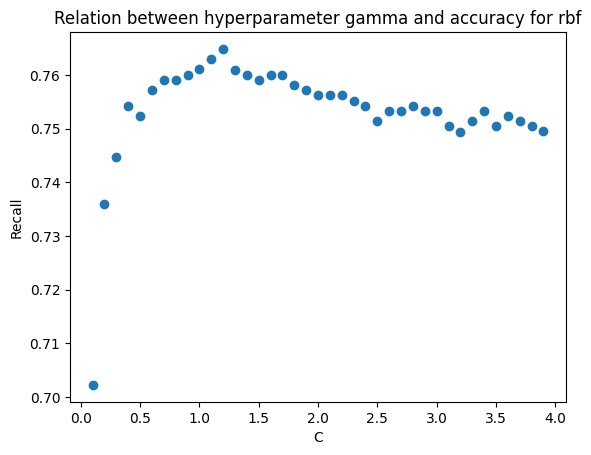

In [131]:
cvSVMGamma('rbf', 40, 10, 'accuracy')

It seems like the accuracy increases from gamma=0 to 0.7, and then it stays around the same. We will choose 0.7 as an adequate value for the gamma hyperparameter. The best model we found for the SVM in terms of its accuracy has the following hyperparameters: RBF kernel, 1.5 for C and 0.7 for gamma. Now we will train this model in the full training set and test it on the test set.

In [132]:
#Best Results for Acc: Kernel = RBF, C = 1.5, Gamma = 0.7

svmRBF = SVC(kernel='rbf', C=1.5, gamma=0.7)
svmRBF.fit(X_undersampled, y_undersampled)

SVC(C=1.5, gamma=0.7)

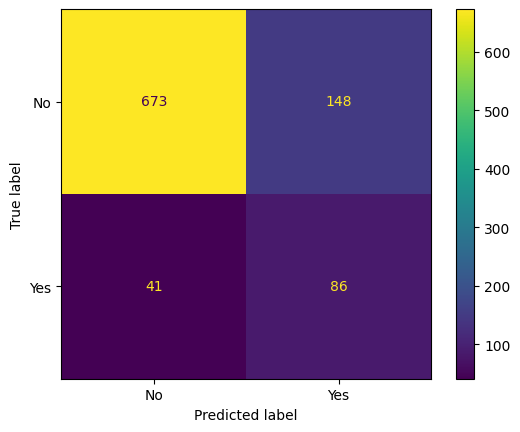

RBF Kernel SVM:
TP: 86, TN: 673, FP: 148, FN: 41
Accuracy: 0.8006329113924051
Error: 0.1993670886075949
Recall: 0.6771653543307087
Specificity: 0.8197320341047503
Precision: 0.36752136752136755
F1: 0.47645429362880887


In [133]:
evaluate(svmRBF, 'RBF')

We can see that the overall accuracy of the model was not very high, staying around 82%. This indicates that the svm may not be the indicated model to be used for this dataset. This may be because none of the used kernels can disperse the data in a way that creates a linear separation.

## NN

In [134]:
params = {
    'hidden_layer_sizes': [(100,), (50, 50), (25, 25, 25)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01],
    'batch_size': [16, 32, 64],
    'max_iter': [9999999999]
    }

clf_accuracy = GridSearchCV(estimator=MLPClassifier(),param_grid=params,cv=5,n_jobs=5,verbose=1,scoring='accuracy')
clf_accuracy.fit(X_train,y_train)

print(clf_accuracy.best_params_)
nn_accuracy = MLPClassifier(**clf_accuracy.best_params_) 

f1 = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average='micro')

clf_f1 = GridSearchCV(estimator=MLPClassifier(),param_grid=params,cv=5,n_jobs=5,verbose=1,scoring=f1)
clf_f1.fit(X_train,y_train)

print(clf_f1.best_params_)
nn_f1 = MLPClassifier(**clf_f1.best_params_) 

combi_nn = VotingClassifier(estimators=[('acc', nn_accuracy), ('f1', nn_f1)], voting='soft')

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


KeyboardInterrupt: 

In [ ]:
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(nn_accuracy, x, y, cv=cv_strategy, scoring='accuracy')

print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)


cross_val_scores = cross_val_score(nn_f1, x, y, cv=cv_strategy, scoring=f1)

print("Cross-Validation Scores:", cross_val_scores)
print("Mean f1:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

In [ ]:
nn_accuracy.fit(X_oversampled,y_oversampled)

yhat = nn_accuracy.predict(X_test)

acc = sklearn.metrics.accuracy_score(y_test,yhat)
recall = sklearn.metrics.recall_score(y_test,yhat,pos_label='Yes')
prec = sklearn.metrics.precision_score(y_test,yhat,pos_label='Yes')
f1 = sklearn.metrics.f1_score(y_test,yhat,pos_label='Yes')
conf_matrix =  sklearn.metrics.confusion_matrix(y_test,yhat)
print('balanced model')
print(f"accuracy: {acc}")
print(f"recall: {recall}")
print(f"precision: {prec}")
print(f"f1: {f1}")
print(f"confusion matrix:\n{conf_matrix}\n")

nn_f1.fit(X_oversampled,y_oversampled)

yhat = nn_f1.predict(X_test)

acc = sklearn.metrics.accuracy_score(y_test,yhat)
recall = sklearn.metrics.recall_score(y_test,yhat,pos_label='Yes')
prec = sklearn.metrics.precision_score(y_test,yhat,pos_label='Yes')
f1 = sklearn.metrics.f1_score(y_test,yhat,pos_label='Yes')
conf_matrix =  sklearn.metrics.confusion_matrix(y_test,yhat)
print('f1 model')
print(f"accuracy: {acc}")
print(f"recall: {recall}")
print(f"precision: {prec}")
print(f"f1: {f1}")
print(f"confusion matrix:\n{conf_matrix}\n")

combi_nn.fit(X_oversampled,y_oversampled)

yhat = combi_nn.predict(X_test)

acc = sklearn.metrics.accuracy_score(y_test,yhat)
recall = sklearn.metrics.recall_score(y_test,yhat,pos_label='Yes')
prec = sklearn.metrics.precision_score(y_test,yhat,pos_label='Yes')
f1 = sklearn.metrics.f1_score(y_test,yhat,pos_label='Yes')
conf_matrix =  sklearn.metrics.confusion_matrix(y_test,yhat)
print('combination model')
print(f"accuracy: {acc}")
print(f"recall: {recall}")
print(f"precision: {prec}")
print(f"f1: {f1}")
print(f"confusion matrix:\n{conf_matrix}\n")